final project
===

due: June 30 2022

authors: pegler, prüwasser, scheftner

## Dataset 1: EEG experiment with psychopaths

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7790284/

Konicar, L., Radev, S., Silvoni, S., Bolinger, E., Veit, R., Strehl, U., Vesely, C., Plener, P.L., Poustka, L., & Birbaumer, N. (2021). Balancing the brain of offenders with psychopathy? Resting state EEG and electrodermal activity after a pilot study of brain self-regulation training. PloS one, 16(1), e0242830.

### Description

#### Title of original study

Balancing the brain of offenders with psychopathy? Resting state EEG and electrodermal activity after a pilot study of brain self-regulation training (Konicar, Radev & Silvoni, 2021)

#### Purpose
Sheding light on the brain plasticity of offenders with psychopathy. A previous study of the authors demonstrated successful brain self-regulation with SCP (slow-cortical potential) neurofeedback.

#### Theoretical background
Psychopaths have excessive slow-wave band activity (which is 1-8Hz, in temporal or parietal regions, according wave-bands are theta and delta). This is linked to decreased arousal, elevated anger, aggressiveness, violence (e.g. antisocial personality). For EEG measures, psychopaths had been found to show decreased alpha frequency power (which is 8-12 Hz) at midline, parietal, and temporal regions. This was further linked to shallow affect, failure to take responsibility for one’s own actions and inhibition. Also, alpha frequency represents long-range communication between different brain regions. Another variable of interest is skin conductance in psychopaths: since it is reduced at rest, in anticipation of aversion and as reaction to stimulus.

#### Hypotheses
Central nervous and autonomic peripheral changes were expected after self-regulation of brain activity. Changes in EEG after SCP-neurofeedback training at temporal parietal and midline areas. Those changes would be: slow frequency overrepresentation decreased, alpha frequency increased. Expected increase in skin resistance during brain regulation trials requiring a reduction of cortical activity (positivity trials), while a decrease in skin resistance during brain regulation trials requiring an increase of cortical activity (negativity trials) was expected. Lastly, the the relationships between cortical and peripheral changes and changes in subjective self-reports (e.g., aggression, empathy, behavioral, approach) was investigated.

#### Participants
14 male patients mean age 43.14


#### Pre study (day 1-7)
Hares-Psychopathy-Checklist-Revised (PCL-R) for measuring psychopathy. Includes: Interpersonal facet and affective facet (summed up as F1, most important), lifestyle facet and antisocial behavior facet (summed up as F2) in sum encompassing 20 items. Inclusion for study was PCL-R score above 26. 
#### Resting state EEG pre neurofeedback (day 1-7)
For cortical and peripheral data, 8 1-minute trials per participant were conducted: four with eyes open (O) 4 closed (C) order: COCO- Break- OCOC. Total 8 minutes EEG pre treatment.
#### Brain self – regulation with slow cortical potential neurofeedback (on days 8-19, then break, then on days 33-45 trainings conducted again)
25 EEG slow-potential training sessions per participant: SCPs recorded at fronto-central regions and fed back via moving avatar to feedback monitor of participants. At beginnings of trials intended direction of SCP shifts was indicated by pointing of a triangle: Positive (inhibition of cortical activation triangle pointing downwards) and negative (increase of cortical activation, triangle pointing upwards ) SCP shifts were expected from participants. In active regulation the avatar moved upwards for increased activation and downwards for decreased activation.
→ Task was to learn volitional control of SCPs to move avatar
Each training session consisted of feedback block 1, a transfer block (no feedback, just reward) and feedback block 2.
#### Electrodermal activity assessed during training sessions (on days 8-19, then break, then on days 33-45 measurements conducted again)
Recorded as skin resistance
#### Resting state EEG Post
For cortical and peripheral data, 8 1-minute trials per participant were conducted: four with eyes open (O) 4 closed (C) order: COCO- Break- OCOC. Total 8 minutes EEG post treatment.
#### Results
Central nervous system: suppression of psychopathic overrepresentation of slow frequency bands (theta and delta) after EEG SCP neurofeedback -> reduction of slow frequency delta and theta bands. Also increase in alpha band activity. Electrodermal activity changed accordingly. These results indicate a successful learning process and plasticity in neural and peripheral structures of psychopathic offenders.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


file = 'data/final_data/auc_ec_eo_with_gamma.csv'

df = pd.read_csv(file, sep=";", index_col=0)

df.head()

,Factor,Power,Time,ROI,Frequency,Eyes
id,,,,,,
1,GAMMA_aucp_PRE_EC_midline,0.00390,Pre,Midline,Gamma,EC
2,GAMMA_aucp_PRE_EC_midline,0.00496,Pre,Midline,Gamma,EC
3,GAMMA_aucp_PRE_EC_midline,0.00612,Pre,Midline,Gamma,EC
4,GAMMA_aucp_PRE_EC_midline,0.01122,Pre,Midline,Gamma,EC
5,GAMMA_aucp_PRE_EC_midline,0.02378,Pre,Midline,Gamma,EC


## Distribution of EEG power across all conditions

### Plots

In order to use only libraries that were used in class we coded this in `matplotlib`. With the library `seaborn` we could have achieved the same with just a few lines of code. With `matplotlib` it is a bit tedious and violins look more like carrots (there seems no easy way to change that).

#### Example code with `seaborn`

```python

import seaborn as sns

g = sns.catplot(data=df,
                x="Time",
                y="Power",
                hue="Eyes",
                col="ROI",
                row="Frequency",
                palette=sns.color_palette(["steelblue", "goldenrod", "salmon", "firebrick"]),
                kind="violin", split=False, height=5, aspect=1.2, inner="quartile",
                sharey=False)
sns.move_legend(g, "upper center", bbox_to_anchor=(0.5, 0), fontsize=12, ncol=2)
plt.tight_layout()

```

#### Plot coded in `matplotlib`

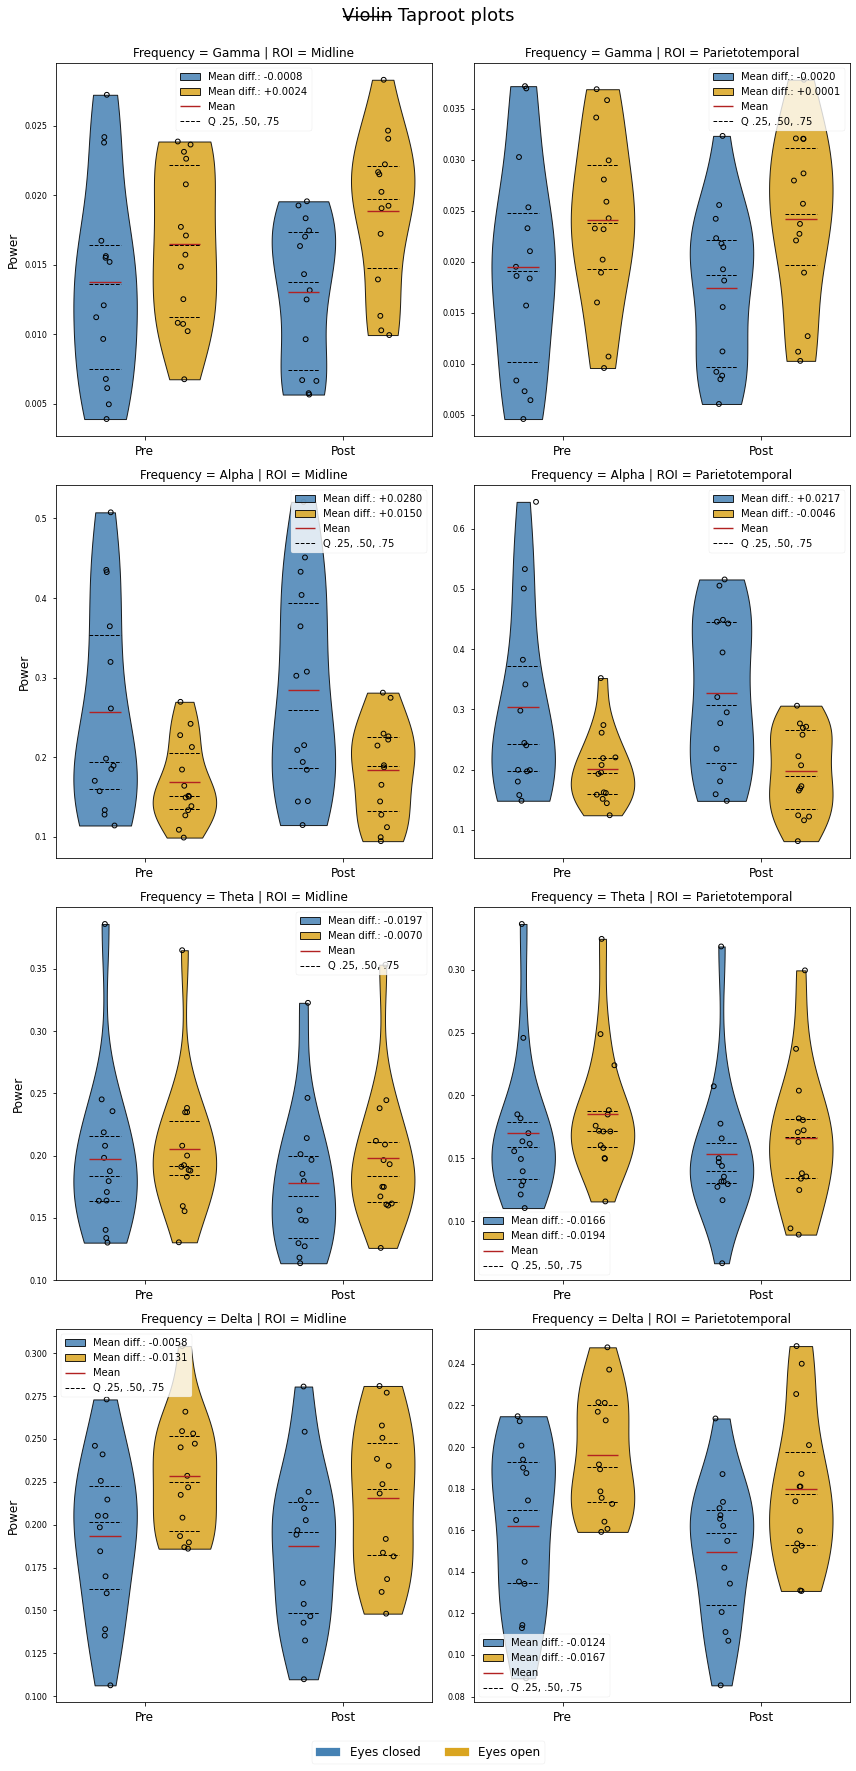

In [2]:
plt.style.use('seaborn-paper')

from scipy.stats import kde

violin_times = df.Time.unique()
violin_rois = df.ROI.unique()
violin_eyes = ["EC", "EO"]
violin_frequencies = df.Frequency.unique()

fig, axs = plt.subplots(4, 2, figsize=(12, 24))

for i_roi, violin_roi in enumerate(violin_rois):
    for i_freq, violin_freq in enumerate(violin_frequencies):
        for i_time, violin_time in enumerate(violin_times):

            violin_data = df.loc[
                (df["ROI"]==violin_roi) &
                (df["Frequency"]==violin_freq),
                ["Eyes", "Time", "Power"]].reset_index().pivot(index=["id", "Time"], columns="Eyes", values="Power").reset_index()

            vp = axs[i_freq][i_roi].violinplot(
                violin_data.loc[violin_data["Time"] == violin_time, violin_eyes],
                positions=[2.5*i_time, 2.5*i_time+1],
                vert=True,
                widths=.8,
                showextrema=False,
                showmedians=False,
                showmeans=True,
                bw_method="scott",
                quantiles=[[.25, .5, .75], [.25, .5, .75]],
            )


            for violin_bodies in vp['bodies']:
                violin_bodies.set_edgecolor("black")
                violin_bodies.set_linewidth(1)
                violin_bodies.set_alpha(.85)


            vp["bodies"][0].set_facecolor("steelblue")
            vp["bodies"][1].set_facecolor("goldenrod")
            vp["cquantiles"].set_linewidth([1, 1, 1])
            vp["cquantiles"].set_edgecolors(["black", "black", "black"])
            vp["cmeans"].set_linewidth(1.4)
            vp["cmeans"].set_edgecolor("firebrick")
            vp["cquantiles"].set_linestyle(["dashed", "dashed","dashed"])
            vp["cquantiles"].set_rasterized(10)
            
            violin_label = violin_data.drop("id", axis=1).melt(id_vars=["Time"], value_name="Power").groupby(["Time", "Eyes"]).mean()
            mean_diff_ec = violin_label.loc[("Post", "EC"), "Power"] - violin_label.loc[("Pre", "EC"), "Power"]
            mean_diff_eo = violin_label.loc[("Post", "EO"), "Power"] - violin_label.loc[("Pre", "EO"), "Power"]
            
            if i_time == 0:
                vp["bodies"][0].set_label(f"Mean diff.: {mean_diff_ec:+.4f}")
                vp["bodies"][1].set_label(f"Mean diff.: {mean_diff_eo:+.4f}")
                vp["cmeans"].set_label("Mean")
                vp["cquantiles"].set_label("Q .25, .50, .75")

            scatter = axs[i_freq][i_roi].scatter(
                [(2.5*i_time+np.random.normal(0,.05)) for i in range(int(len(violin_data)/2))],
                violin_data.loc[violin_data["Time"] == violin_time, "EC"],
                marker="o",
                color="none",
                s=23,
                edgecolors="black",
                linewidths=1
                                                 
            )
            scatter = axs[i_freq][i_roi].scatter(
                [(2.5*i_time+1+np.random.normal(0,.05)) for i in range(int(len(violin_data)/2))],
                violin_data.loc[violin_data["Time"] == violin_time, "EO"],
                marker="o",
                color="none",
                s=23,
                edgecolors="black",
                linewidths=1,
            )

            
        axs[i_freq][i_roi].set_title(f"Frequency = {violin_freq} | ROI = {violin_roi}", fontsize=12)
        axs[i_freq][i_roi].set_xticks([0.5, 3], violin_times, fontsize=12)
        axs[i_freq][0].set_ylabel("Power", fontsize=12)
        axs[i_freq][i_roi].legend(fontsize=10)


# Labels to use in the legend for each line
labels = ["in 2019", "in 2020"]

# Title for subplots
fig.suptitle('\u0336'.join("Violin") + '\u0336' +' Taproot plots', fontsize=18, y=1)

import matplotlib.patches as mpatches

l1 = mpatches.Patch(color='steelblue', label='Eyes closed')
l2 = mpatches.Patch(color='goldenrod', label='Eyes open')

fig.legend(handles=[l1, l2], loc="upper center", bbox_to_anchor=(0.5, 0), fontsize=12, ncol=2)
        
plt.tight_layout()

<div class="alert alert-warning">Maybe someone has an idea how to get real violins without cutting the ends. And maybe also how to extend the quantile lines ...</div>

#### Summary table distributions

In [3]:
df_grp = df.groupby(["Time", "ROI", "Frequency", "Eyes"]).mean().reset_index()
df_grp = df_grp.pivot(index=["ROI", "Frequency", "Eyes"], columns="Time", values="Power").reset_index()
df_grp = df_grp.reindex(columns=["ROI", "Frequency", "Eyes", "Pre", "Post"])
df_grp["Diff"] = df_grp["Post"] - df_grp["Pre"]
df_grp

Time,ROI,Frequency,Eyes,Pre,Post,Diff
0,Midline,Alpha,EC,0.257031,0.285041,0.028010
1,Midline,Alpha,EO,0.168580,0.183617,0.015037
2,Midline,Delta,EC,0.193173,0.187387,-0.005786
3,Midline,Delta,EO,0.228416,0.215366,-0.013050
4,Midline,Gamma,EC,0.013781,0.013026,-0.000756
5,Midline,Gamma,EO,0.016463,0.018830,0.002367
6,Midline,Theta,EC,0.197239,0.177586,-0.019653
7,Midline,Theta,EO,0.204900,0.197930,-0.006970
8,Parietotemporal,Alpha,EC,0.304755,0.326416,0.021661
9,Parietotemporal,Alpha,EO,0.201677,0.197118,-0.004559


## Testing for mean difference between Pre and Post across all conditions

### $t$-test

In [9]:
from pingouin import ttest, power_ttest

def get_ttest(df, conditions=None, paired=True, alternative='two-sided', correction='auto', r=0.707, conf=0.95):
    Pre, Post = df.loc[df["Time"]=="Pre"], df.loc[df["Time"]=="Post"]
    if conditions != None:
        if type(conditions) != dict:
            raise Exception("Condition argument needs to be a dict!")
        for c in conditions:
            Pre = Pre.loc[Pre[c]==conditions[c]]
            Post = Post.loc[Post[c]==conditions[c]]

    tt_res = ttest(Pre["Power"], Post["Power"], paired=paired, alternative=alternative, correction=correction, r=r, confidence=conf)
    if paired == True:
        contrast = "paired"
    else:
        contrast ="two-samples"
    tt_power_80 = power_ttest(d=tt_res["cohen-d"][0], power=0.8, contrast=contrast, alternative=alternative)
    return tt_res, tt_power_80

#### Overall

In [10]:
tt_res_overall, tt_power_80 = get_ttest(df)
tt_res_overall["BF10"] = tt_res_overall["BF10"].astype(float)
tt_res_overall["BF01"] = 1/tt_res_overall["BF10"]
tt_res_overall

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power,BF01
T-test,1.374195,223,two-sided,0.170761,"[-0.0, 0.01]",0.029173,0.189,0.071919,5.291005


In [11]:
print(f"To find an existing effect of d ={tt_res_overall['cohen-d'][0]: .3f} in 80% of the cases we would need a sample size of {round(tt_power_80)} participants")

To find an existing effect of d = 0.029 in 80% of the cases we would need a sample size of 9224 participants


#### Interpretation of effect

The $t$-test $p$-value does not indicate a significant effect. The Bayes-factor shows moderate evidence for absence of effect ($H_0$).

#### The 16 conditions

In [13]:
freq_s = ["Alpha", "Delta", "Gamma", "Theta"]
roi_s = ["Midline", "Parietotemporal"]
eyes_s = ["EO", "EC"]

tt_res = None
for freq in freq_s:
    for roi in roi_s:
        for eyes in eyes_s:
            tmp, pwr = get_ttest(df, conditions = {"Frequency":freq, "ROI":roi, "Eyes":eyes})
            tmp["Frequency"] = freq
            tmp["ROI"] = roi
            tmp["Eyes"] = eyes
            if type(tt_res) != pd.core.frame.DataFrame:
                tt_res = tmp
            else:
                tt_res = pd.concat([tt_res, tmp], sort=False).reset_index(drop=True)
tt_res = tt_res.set_index(["Frequency", "ROI", "Eyes"])
tt_res["BF10"] = tt_res["BF10"].astype(float)
tt_res["BF01"] = 1/tt_res["BF10"]
tt_res

T  dof alternative     p-val  \
Frequency ROI             Eyes                                        
Alpha     Midline         EO   -1.809307   13   two-sided  0.093576   
                          EC   -2.332492   13   two-sided  0.036394   
          Parietotemporal EO    0.365916   13   two-sided  0.720313   
                          EC   -1.103179   13   two-sided  0.289953   
Delta     Midline         EO    1.854440   13   two-sided  0.086495   
                          EC    1.021372   13   two-sided  0.325710   
          Parietotemporal EO    3.343845   13   two-sided  0.005283   
                          EC    2.249236   13   two-sided  0.042467   
Gamma     Midline         EO   -2.623542   13   two-sided  0.021044   
                          EC    0.887494   13   two-sided  0.390937   
          Parietotemporal EO   -0.050161   13   two-sided  0.960757   
                          EC    1.396356   13   two-sided  0.185994   
Theta     Midline         EO    0.735827   13   two-sided  0.474904   
                          EC    1.681222   13   two-sided  0.116572   
          Parietotemporal EO    2.544199   13   two-sided  0.024460   
                          EC    2.498032   13   two-sided  0.026688   

                                        CI95%   cohen-d   BF10     power  \
Frequency ROI             Eyes                                             
Alpha     Midline         EO     [-0.03, 0.0]  0.264700  0.981  0.150878   
                          EC    [-0.05, -0.0]  0.213482  2.014  0.114915   
          Parietotemporal EO    [-0.02, 0.03]  0.068266  0.286  0.056467   
                          EC    [-0.06, 0.02]  0.150212  0.451  0.081713   
Delta     Midline         EO     [-0.0, 0.03]  0.330338  1.040  0.208802   
                          EC    [-0.01, 0.02]  0.121707  0.421  0.070710   
          Parietotemporal EO     [0.01, 0.03]  0.492474  9.613  0.400174   
                          EC      [0.0, 0.02]  0.329338  1.786  0.207823   
Gamma     Midline         EO     [-0.0, -0.0]  0.416427  3.107  0.303249   
                          EC      [-0.0, 0.0]  0.117639  0.378  0.069335   
          Parietotemporal EO      [-0.0, 0.0]  0.008794  0.270  0.050107   
                          EC     [-0.0, 0.01]  0.219019  0.603  0.118409   
Theta     Midline         EO    [-0.01, 0.03]  0.125879  0.341  0.072170   
                          EC    [-0.01, 0.04]  0.320145  0.836  0.198958   
          Parietotemporal EO      [0.0, 0.04]  0.361114  2.756  0.240328   
                          EC      [0.0, 0.03]  0.286544  2.571  0.168700   

                                    BF01  
Frequency ROI             Eyes            
Alpha     Midline         EO    1.019368  
                          EC    0.496524  
          Parietotemporal EO    3.496503  
                          EC    2.217295  
Delta     Midline         EO    0.961538  
                          EC    2.375297  
          Parietotemporal EO    0.104026  
                          EC    0.559910  
Gamma     Midline         EO    0.321854  
                          EC    2.645503  
          Parietotemporal EO    3.703704  
                          EC    1.658375  
Theta     Midline         EO    2.932551  
                          EC    1.196172  
          Parietotemporal EO    0.362845  
                          EC    0.388954

#### InterPretation of effects

***p*-values**  

We see significant effects, but in the light of the low power (sample size of 14) it's probably not a good idea to interPret them. We probably need to manipulate only 1 participant's value to get fundamentally different *p* values.  

**Bayes factor analysis**

As cut off values we see a Bayes factor of > 3 as moderate and Bayes factors > 10 as strong evidence.

Found evidence for the following conditions:

Alpha, Parietemporal, Eyes open: Moderate evidence for the .H_0..  
Delta, Parietemporal, Eyes open: Moderate to strong evidence for the .H_1..  
Gamma, Midline, Eyes open: Moderate evidence for the .H_1..  
Gamma, Parietemporal, Eyes open: Moderate evidence for the .H_0..  


For all other conditions we did not find evidence.

### Permutation test

In [63]:
from scipy.stats import ttest_rel


def perm_test(arr_1, arr_2, n_repetitions=5000):
    """
    Permutation test.

    Parameters
    ----------
    arr_1 : array_like
        1st 1-dimensional array
    arr_2 : array_like
        2nd 1-dimensional array
    n_repetitions : int, optional
        Number of repetitions, by default 2000

    Returns
    -------
    p_val
        p-value of the permutation test
    """
    res = list()
    
    mean_diff = arr_1.mean() - arr_2.mean()
    
    for i in range(n_repetitions):
        arr_comb = np.concatenate((arr_1,arr_2))
        arr_perm = np.random.permutation(arr_comb) 
        arr_split_1 = arr_perm[0:int(len(arr_comb)/2)]
        arr_split_2 = arr_perm[int(len(arr_comb)/2):]
        mean_delta_perm = arr_split_1.mean() - arr_split_2.mean()
        res.append(mean_delta_perm)    

    p_val = np.sum(np.abs(res > np.abs(mean_diff))) / n_repetitions

    return p_val


def get_ptest(df, conditions=None):
    """
    Wrapper around perm_test() for more conditions. Includes comparison with paired t-test.
    
    """
    Pre, Post = df.loc[df["Time"]=="Pre"], df.loc[df["Time"]=="Post"]
    if conditions != None:
        if type(conditions) != dict:
            raise Exception("Condition argument needs to be a dict!")
        for c in conditions:
            Pre = Pre.loc[Pre[c]==conditions[c]]
            Post = Post.loc[Post[c]==conditions[c]]

    Pre = Pre.Power
    Post = Post.Power
    mean_diff = Pre.mean() - Post.mean()
    sd_pooled = np.sqrt((Pre.std()**2 + Post.std()**2)/2)
    cohens_d = mean_diff / sd_pooled
    p_val_perm = perm_test(Pre, Post)
    _,p_val_ttest = ttest_rel(Pre, Post)
    pt_res = pd.DataFrame([[len(Pre), cohens_d, p_val_perm, p_val_ttest]], columns=["n", "cohen-d", "p-val permutation test", "p-val t-test"])
    
    return pt_res

#### Permutation test: Overall

In [64]:
get_ptest(df)

,n,cohen-d,p-val permutation test,p-val t-test
0,224,0.029173,0.3826,0.170761


#### Permutation test: The 16 conditions

In [65]:
pt_res = None

for freq in freq_s:
    for roi in roi_s:
        for eyes in eyes_s:
            tmp = get_ptest(df, conditions = {"Frequency":freq, "ROI":roi, "Eyes":eyes})
            tmp["Frequency"] = freq
            tmp["ROI"] = roi
            tmp["Eyes"] = eyes
            if type(pt_res) != pd.core.frame.DataFrame:
                pt_res = tmp
            else:
                pt_res = pd.concat([pt_res, tmp], sort=False).reset_index(drop=True)
pt_res = pt_res.set_index(["Frequency", "ROI", "Eyes"])
pt_res

n   cohen-d  p-val permutation test  \
Frequency ROI             Eyes                                         
Alpha     Midline         EO    14 -0.264700                  0.2430   
                          EC    14 -0.213482                  0.2948   
          Parietotemporal EO    14  0.068266                  0.4062   
                          EC    14 -0.150212                  0.3534   
Delta     Midline         EO    14  0.330338                  0.2040   
                          EC    14  0.121707                  0.3740   
          Parietotemporal EO    14  0.492474                  0.1024   
                          EC    14  0.329338                  0.1906   
Gamma     Midline         EO    14 -0.416427                  0.1330   
                          EC    14  0.117639                  0.3678   
          Parietotemporal EO    14 -0.008794                  0.4864   
                          EC    14  0.219019                  0.2804   
Theta     Midline         EO    14  0.125879                  0.3682   
                          EC    14  0.320145                  0.2068   
          Parietotemporal EO    14  0.361114                  0.1704   
                          EC    14  0.286544                  0.2314   

                                p-val t-test  
Frequency ROI             Eyes                
Alpha     Midline         EO        0.093576  
                          EC        0.036394  
          Parietotemporal EO        0.720313  
                          EC        0.289953  
Delta     Midline         EO        0.086495  
                          EC        0.325710  
          Parietotemporal EO        0.005283  
                          EC        0.042467  
Gamma     Midline         EO        0.021044  
                          EC        0.390937  
          Parietotemporal EO        0.960757  
                          EC        0.185994  
Theta     Midline         EO        0.474904  
                          EC        0.116572  
          Parietotemporal EO        0.024460  
                          EC        0.026688

The permutation test showed persistently higher .p.-values than the .t.-test yet none of them turned out significant (<.05). This suggests that the results are not too different from random.

### Power analysis

#### Classic

See above *t*-test results.

#### Simulation

<div class="alert alert-warning">This is a python port of the R-function that is used by Ulrich Ansorge's PhD students.</div>

##### Create copy of data table with some additional variables for simulation

In [234]:
df_pwr = df.copy().drop("Factor", axis=1).reset_index().rename(columns={"id":"sbj"})

df_pwr["condition"] = df_pwr["Time"] + "_" +df_pwr["Frequency"] + "_" + df_pwr["ROI"] + "_" + df_pwr["Eyes"]

# initiate variables
vpn = None
i = None
j = None
df_pwr["Power_normalized"] = 0 


# this will result in just 0 for Power_normalized and mean for Power_normalized_real if every subject was measured only once in each condition
for i in range(0, len(df_pwr.sbj.unique())): # loop over all subjects
    vpn_temp = df_pwr.sbj.unique()[i]
    for j in range(0, len(df_pwr.condition.unique())):  # nested loop over all conditions per subject
        condition_temp = df_pwr.condition.unique()[j] 
        mean_power_temp = (df_pwr.loc[(df_pwr.condition == condition_temp) & (df_pwr.sbj == vpn_temp)].Power).mean() # comppute mean power for this condition
        df_pwr.loc[(df_pwr.condition == condition_temp) & (df_pwr.sbj == vpn_temp), "Power_normalized"] = df_pwr.loc[(df_pwr.condition == condition_temp) & (df_pwr.sbj == vpn_temp), "Power"] - mean_power_temp # subtract mean power from all power values
      
 # To make power easier to interPret we again add the mean of all power values. This wont affect the distribution.
df_pwr["Power_normalized_real"] = df_pwr.Power_normalized + df_pwr.Power.mean()

##### Create template data table


In [235]:
# copy from the real data used for the analysis
df_template = df_pwr.loc[:, ["Time", "Eyes", "ROI", "Frequency", "sbj"]].copy()

##### Helper function

In [236]:
from time import time
from scipy.stats import ttest_1samp

def np_rep(x, reps=1, each=False, length=0):
    """ implementation of functionality of rep() and rep_len() from R

    Attributes:
        x: numpy array, which will be flattened
        reps: int, number of times x should be repeated
        each: logical; should each element be repeated reps times before the next
        length: int, length desired; if >0, overrides reps argument
    """
    if length > 0:
        reps = np.int(np.ceil(length / x.size))
    x = np.repeat(x, reps)
    if(not each):
        x = x.reshape(-1, reps).T.ravel() 
    if length > 0:
        x = x[0:length]
    return(x)

##### Main function

In [251]:
def run_pwr_simulation(df_template, df, n_sim, effect, sample_size, sim_sample_size, trial_change_factor):
    """Computes power simulation analysis. R-Function rewritten in python."""

    sim_list = []
    j = None
    i =  None
    for j in range(n_sim):
        start_time = time()
        sim_data = df_template.copy()
        if (sim_sample_size < sample_size):
            random_sbj = np.random.choice(sim_data.sbj.unique(), size=sim_sample_size)
            sim_data = sim_data[sim_data.sbj in random_sbj,]

        elif (sim_sample_size > sample_size):
            sample_size_increase = sim_sample_size - sample_size
            if (sample_size_increase <= sample_size):
                random_sbj = np.random.choice(sim_data.sbj.unique(), size=sample_size_increase)
                sim_data_addition = sim_data.loc[sim_data.sbj in random_sbj,]
                sim_data = pd.concat([sim_data, sim_data_addition], sort=False)

            elif (sample_size_increase > sample_size):
                sim_repetition = np.floor(sim_sample_size / sample_size)
                sim_data_base = sim_data[np.rep(list(range(0,len(sim_data))), times = sim_repetition), ]
                sim_data_base["repetition"] = np.rep(list(range(0,sim_repetition)), each = len(sim_data))
                sim_data_base["sbj_new"] = int(sim_data_base.sbj)
                sim_data_base["sbj_new"] = sim_data_base.sbj_new + sample_size * (sim_data_base.repetition-1)
                sim_data_base["sbj"] = sim_data_base.sbj_new
                sim_data_base["repetition"] = None
                sim_data_base["sbj_new"] = None
                random_sbj = np.random.choice(0, len(unique(sim_data.sbj)), sim_sample_size % sample_size)
                sim_data_addition = sim_data[sim_data.sbj in random_sbj,]
                sim_data_addition.sbj = factor(sim_data_addition.sbj, levels = (unique(sim_data_addition.sbj)))
                sim_data = pd.concat([sim_data, sim_data_addition], sort=False)

        if (trial_change_factor < 1):
            sim_data = sim_data[np.random.choice(list(range(len(sim_data))), size = round(len(sim_data) * trial_change_factor))]
        elif (trial_change_factor > 1):
            sim_data = pd.concat([sim_data.loc[np.rep(list(range(len(sim_data))), times = np.floor(trial_change_factor)), ],
                             sim_data.loc[np.random.choice(list(range(len(sim_data))), size = np.round(len(sim_data) * (trial_change_factor-floor(trial_change_factor))))]], sort=False)

        for i in range(0, sim_sample_size):
            # simulates random interindividual variance
            individual_power_variance = np.random.normal(loc = 0, scale = 0.05, size = 1)
            Power_var_sd = 0.015
            Power_var1 = np.random.normal(loc = 0, scale = Power_var_sd, size = 1)
            Power_var2 = np.random.normal(loc = 0, scale = Power_var_sd, size = 1)
            Power_var3 = np.random.normal(loc = 0, scale = Power_var_sd, size = 1)
            Power_var4 = np.random.normal(loc = 0, scale = Power_var_sd, size = 1)
            Power_var5 = np.random.normal(loc = 0, scale = Power_var_sd, size = 1)
            Power_var6 = np.random.normal(loc = 0, scale = Power_var_sd, size = 1)

            # simulate reaction times per condition
            Power_1 = np.random.choice(df.Power_normalized_real - effect + individual_power_variance,
                           len(sim_data[(sim_data.sbj == i+1) & (sim_data.Time == "Post") & (sim_data.Eyes == "EC")]),
                           replace = True) + Power_var1
            Power_2 = np.random.choice(df.Power_normalized_real - effect + individual_power_variance,
                           len(sim_data[(sim_data.sbj == i+1) & (sim_data.Time == "Post") & (sim_data.Eyes == "EO")]),
                           replace = True) + Power_var2
            Power_3 = np.random.choice(df.Power_normalized_real - effect + individual_power_variance,
                           len(sim_data[(sim_data.sbj == i+1) & (sim_data.Time == "Pre") & (sim_data.Eyes == "EC")]),
                           replace = True) + Power_var3
            Power_4 = np.random.choice(df.Power_normalized_real - effect + individual_power_variance,
                           len(sim_data[(sim_data.sbj == i+1) & (sim_data.Time == "Pre") & (sim_data.Eyes == "EO")]),
                           replace = True) + Power_var4

            # Zuordnung der simulierten Reaktionszeiten zu den Faktorkombinationen
            sim_data.loc[(sim_data.sbj == i+1) & (sim_data.Time == "Post") & (sim_data.Eyes == "EC"), "Power"] = Power_1
            sim_data.loc[(sim_data.sbj == i+1) & (sim_data.Time == "Post") & (sim_data.Eyes == "EO"), "Power"] = Power_2
            sim_data.loc[(sim_data.sbj == i+1) & (sim_data.Time == "Pre") & (sim_data.Eyes == "EC"), "Power"] = Power_3
            sim_data.loc[(sim_data.sbj == i+1) & (sim_data.Time == "Pre") & (sim_data.Eyes == "EO"), "Power"] = Power_4

        
        sim_data.loc[:, "sim_no"] = j # adds number of simulation to new variable
        sim_list.append(sim_data.copy()) # saves the finished simulated dataframe to the list of simulations
        end_time = time() 
        time_taken = end_time - start_time # duration of simulation

    sim_data = pd.concat(sim_list)


    # Zuletzt vergleichen wir noch die Standardabweichungen der EEGPowerwerte in den Bedingungen der realen und simulierten Daten
    data_trimmed_means_sbj = df.groupby(["sbj", "Time", "ROI", "Eyes"], dropna=False).mean().reset_index().rename(columns={"Power":"mean_power"})
    data_trimmed_sd = data_trimmed_means_sbj.groupby(["Time", "ROI", "Eyes"], dropna=False).std().reset_index().rename(columns={"mean_power":"SD"}).drop("sbj", axis=1)
    sim_data_trimmed_means_sbj = sim_data.groupby(["sbj", "Time", "ROI", "Eyes", "sim_no"], dropna=False).mean().reset_index().rename(columns={"Power":"mean_power"})
    sim_data_trimmed_sd_sim = sim_data_trimmed_means_sbj.groupby(["Time", "ROI", "Eyes", "sim_no"], dropna=False).std().reset_index().rename(columns={"mean_power":"SD"}).drop("sbj", axis=1)
    sim_data_trimmed_sd = sim_data_trimmed_sd_sim.groupby(["Time", "ROI", "Eyes"], dropna=False).mean()
                                                                 

    # Compute treatment effect
    sim_data_means_sbj = sim_data.groupby(["sbj", "Time", "ROI", "Eyes", "sim_no"], dropna=False).mean().reset_index().rename(columns={"Power":"mean_power"})

    sim_treatment_effect = sim_data_means_sbj.pivot(index=["sbj", "ROI", "Eyes", "sim_no"], columns="Time").reset_index()
    sim_treatment_effect["treatment_effect"] = sim_treatment_effect[("mean_power", "Post")] - sim_treatment_effect[("mean_power","Pre")]
    sim_treatment_effect = pd.DataFrame(sim_treatment_effect.values, columns=["sbj", "ROI", "Eyes", "sim_no", "Post", "Pre", "treatment_effect"])
    
    # Compute results
    sim_treatment_effect_results = sim_treatment_effect[["sim_no", "ROI", "Eyes", "treatment_effect"]].groupby(["sim_no", "ROI", "Eyes"]).apply(lambda row: pd.Series({"estimate": np.mean(row["treatment_effect"]), "tstat": ttest_1samp(row["treatment_effect"], 0).statistic, "pvalue": ttest_1samp(row["treatment_effect"], 0).pvalue}))

    sig_niveau = 0.05 # Define level of significance
    n_sim = np.max(sim_treatment_effect_results.reset_index().sim_no)
    
    sim_treatment_effect_results["sig"] = 0
    sim_treatment_effect_results.loc[(sim_treatment_effect_results["tstat"]>0) & (sim_treatment_effect_results["pvalue"]<sig_niveau), "sig"] = 1

    power_results = sim_treatment_effect_results.reset_index().groupby(["ROI", "Eyes"]).sum().rename(columns={"sig":"effect_found"})[["effect_found"]]
    power_results["test_power"] = power_results["effect_found"] / n_sim
    power_results["n_sim"] = n_sim
                                                                 
    print("Duration:",60*time_taken,"s")
    
    return power_results

##### Determine power

In [249]:
condition = "EC"

n_sim = 1000
effect_est = .01 # .01 power treatment effect (smallest relevant effect size)
sim_sample_size = sample_size # sample size for simulation (can be changed!)
trial_change_factor = 1 # change factor for trial number to increase or decrease trial number

res = run_pwr_simulation(df_template, df_pwr, n_sim, effect_est, sample_size, sim_sample_size, trial_change_factor)

Duration: 4.202685356140137 s


In [250]:
res

effect_found  test_power  n_sim
ROI             Eyes                                 
Midline         EC              23    0.023023    999
                EO              25    0.025025    999
Parietotemporal EC              23    0.023023    999
                EO              25    0.025025    999

<div class="alert alert-warning">Plausibility check necessary! Condition for frequency still to be added to function!</div>

### Examples for further Bayesian analyses ...


* https://statsthinking21.github.io/statsthinking21-python/10-BayesianStatistics.html
* https://psycnet.apa.org/record/2012-18082-001
* https://www.sumsar.net/best_online/